In [30]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
#sns.palplot(sns.color_palette("husl", 8))

In [3]:
smps=pd.read_csv('/Users/stella/Desktop/TSI 3031 Particle Counter_20170413.TXT',delimiter='\t',skiprows=4)

In [4]:
smps=smps.reset_index()
smps.columns=smps.iloc[0]
smps=smps.iloc[1:].reset_index()

In [5]:
smps.columns

Index(['index', 'id', 'start', 'end', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6',
       'status', 'bs', 'fs', 'dlimit', 'sheathflow', 'sheathtemperature',
       'sheathpressure', 'chargerflow', 'totalflow', 'chargervoltage',
       'chargercurrent', 'eadtemperature'],
      dtype='object', name=0)

In [7]:
smps.head()

,index,id,start,end,ch1,ch2,ch3,ch4,ch5,ch6,...,fs,dlimit,sheathflow,sheathtemperature,sheathpressure,chargerflow,totalflow,chargervoltage,chargercurrent,eadtemperature
0,1,210868,2017-04-13 12:45:07,2017-04-13 12:59:37,8748.000,2974.000,81.000,73.000,254.000,17.000,...,0,1,20.000,26.000,94.000,433.000,650.000,2268.000,999.000,45.000
1,2,210869,2017-04-13 13:00:06,2017-04-13 13:14:36,9518.000,3887.000,216.000,39.000,218.000,15.000,...,0,1,20.000,27.000,94.000,433.000,651.000,2259.000,1001.000,45.000
2,3,210870,2017-04-13 13:15:06,2017-04-13 13:29:36,10216.000,4318.000,215.000,95.000,313.000,1.000,...,0,1,19.000,26.000,94.000,434.000,652.000,2259.000,1002.000,45.000
3,4,210871,2017-04-13 13:30:06,2017-04-13 13:44:36,11028.000,4295.000,232.000,205.000,399.000,0.000,...,0,1,19.000,27.000,94.000,432.000,649.000,2259.000,1003.000,45.000
4,5,210872,2017-04-13 13:45:07,2017-04-13 13:59:37,11412.000,6271.000,650.000,0.000,115.000,51.000,...,0,1,19.000,27.000,94.000,433.000,649.000,2259.000,1003.000,45.000


In [8]:
del (smps['index'],smps['id'],smps['status'],smps['dlimit'],smps['bs'],smps['fs'],
    smps['sheathtemperature'],smps['sheathflow'],smps['sheathpressure'],smps['eadtemperature'])

In [9]:
smps['start']=smps['start'].apply(lambda x: parse(x))
smps['end']=smps['end'].apply(lambda x: parse(x))

In [10]:
smps['end'][0]-smps['start'][0]

Timedelta('0 days 00:14:30')

In [11]:
smps['delta t']=smps['end']-smps['start']

In [12]:
smps=smps.rename(columns={'ch1':'ch1: 20-30 nm',
                          'ch2':'ch2: 30-50 nm',
                          'ch3':'ch3: 50-70 nm',
                          'ch4':'ch4: 70-100 nm',
                          'ch5':'ch5: 100-200 nm',
                          'ch6':'ch6: 200+ nm'})

In [13]:
del (smps['chargerflow'], smps['totalflow'], smps['chargervoltage'], smps['chargercurrent'])

In [18]:
smps['ch1: 20-30 nm']=smps['ch1: 20-30 nm'].apply(lambda x: np.float(x))
smps['ch2: 30-50 nm']=smps['ch2: 30-50 nm'].apply(lambda x: np.float(x))
smps['ch3: 50-70 nm']=smps['ch3: 50-70 nm'].apply(lambda x: np.float(x))
smps['ch4: 70-100 nm']=smps['ch4: 70-100 nm'].apply(lambda x: np.float(x))
smps['ch5: 100-200 nm']=smps['ch5: 100-200 nm'].apply(lambda x: np.float(x))
smps['ch6: 200+ nm']=smps['ch6: 200+ nm'].apply(lambda x: np.float(x))
smps['sum: 20-200+ nm']=(smps['ch1: 20-30 nm']+smps['ch2: 30-50 nm']+smps['ch3: 50-70 nm']
                        +smps['ch4: 70-100 nm']+smps['ch5: 100-200 nm']+smps['ch6: 200+ nm'])

(1.115, 1000000.0)

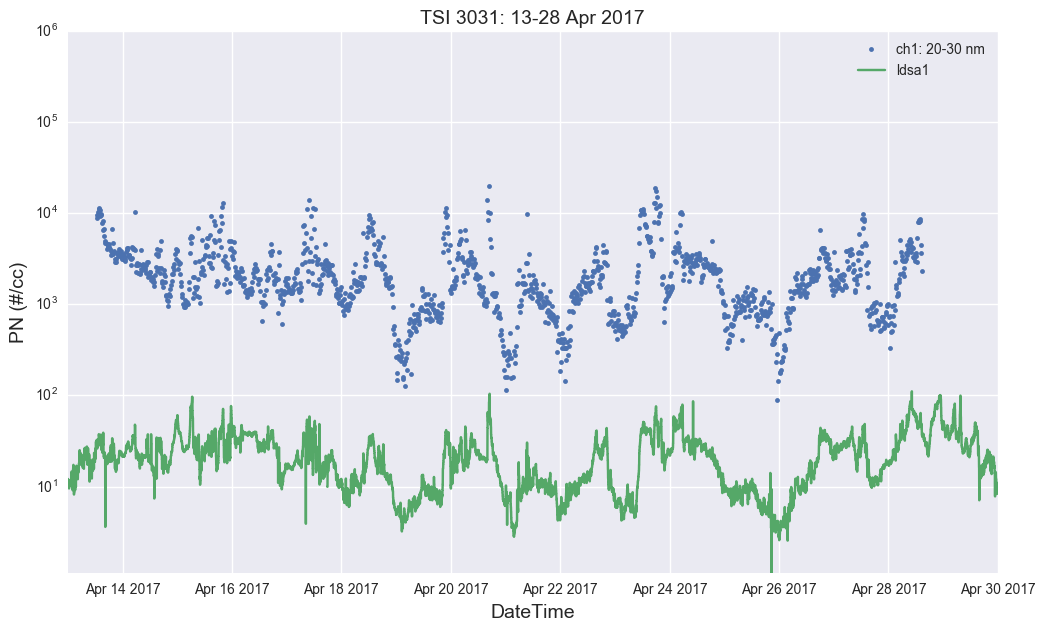

In [270]:
plt.figure(figsize=(12,7))
plt.semilogy(smps['start'],smps['ch1: 20-30 nm'],'.',label='ch1: 20-30 nm')
#plt.semilogy(smps['start'],smps['ch2: 30-50 nm'],'.',label='ch2: 30-50 nm')
#plt.semilogy(smps['start'],smps['ch3: 50-70 nm'],'.',label='ch3: 50-70 nm')
#plt.semilogy(smps['start'],smps['ch4: 70-100 nm'],'.',label='ch4: 70-100 nm')
#plt.semilogy(smps['start'],smps['ch5: 100-200 nm'],'.',label='ch5: 100-200 nm')
#plt.semilogy(smps['start'],smps['ch6: 200+ nm'],'.',label='ch6: 200+ nm')
#plt.semilogy(smps['start'],smps['sum: 20-200+ nm'],'.',color='r')
plt.plot(pegasor['DateTime'],pegasor['ldsa1'])
plt.legend()
plt.title('TSI 3031: 13-28 Apr 2017',fontsize=14)
plt.xlabel('DateTime',fontsize=14)
plt.ylabel('PN (#/cc)',fontsize=14)
#plt.yscale('log')
plt.ylim(0,10e5)
#plt.grid(True, which="both")
#plt.grid(True,which="minor",ls="-", color='0.65')
#plt.ticker.LogLocator(base=10.0, subs=(1.0, ), numdecs=4, numticks=None)

In [26]:
d1 = smps['start'][0]
# wait a few seconds
d2 = smps['end'][0]
d3 = d1 + (d2 - d1) / 2
# d3 will be the timestamp exactly in between d1 & d2

In [249]:
teom=pd.read_csv('/Users/stella/Desktop/1405DF TEOM_A225741308_2017-04-28_16-07-18.csv',delimiter=',',skiprows=3).reset_index()

In [250]:
del teom['index']

In [251]:
teom.columns=['date','time','AFEM','BFEMCOARSE','DichotFEM']

In [252]:
#teom['date']=teom['date'].apply(lambda x: parse(x))
#teom['time']=teom['time'].apply(lambda x: parse(x))
#teom['time']=teom['time'].apply(lambda x: x.time())

In [253]:
teom['datetime']=pd.to_datetime(teom['date'] + ' ' + teom['time'])

In [254]:
teom=teom[teom['datetime']>datetime.date(2017,4,7)]

In [255]:
teom=teom[teom['datetime']<datetime.date(2017,4,14)]

In [256]:
teom=teom[teom['DichotFEM']>0]

In [257]:
del teom['date'],teom['time']

In [258]:
del teom['AFEM'],teom['BFEMCOARSE']

In [209]:
del teom['AFEM'],teom['BFEMCOARSE']

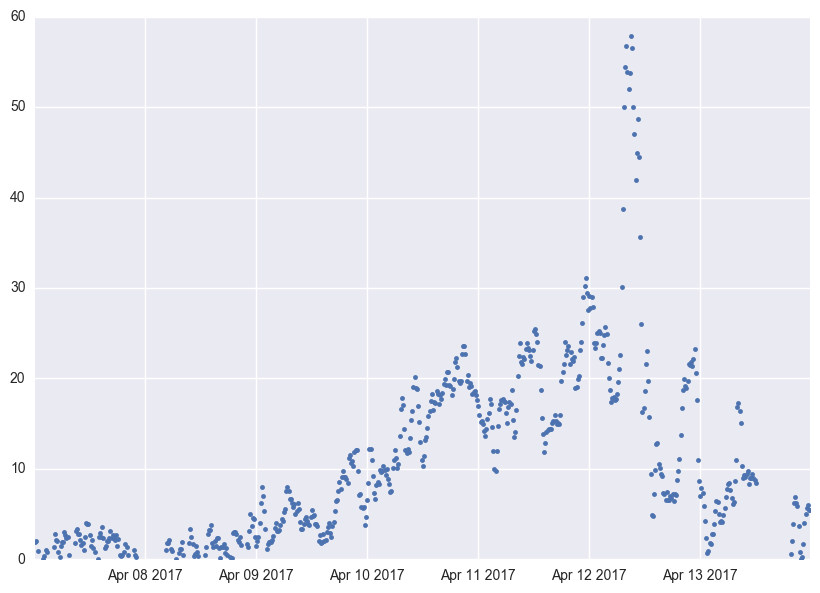

In [260]:
plt.figure(figsize=(10,7))
plt.plot(teom['datetime'],teom['DichotFEM'],'.')

In [267]:
pegasor

,DateTime,ldsa1,pn1,ldsa2,pn2,ldsa3,pn3
0,2017-04-13 00:00:00,12.105,69275.665,10.272,41631.462,12.666,73347.542
1,2017-04-13 00:01:00,12.105,69275.665,10.272,41631.462,11.776,68192.162
2,2017-04-13 00:02:00,12.105,69275.665,9.634,39071.659,11.776,68192.162
3,2017-04-13 00:03:00,12.105,69275.665,9.634,39071.659,10.992,63790.638
4,2017-04-13 00:04:00,11.506,65806.839,9.647,39180.557,10.992,63790.638
5,2017-04-13 00:05:00,11.506,65806.839,9.647,39180.557,11.452,66476.486
6,2017-04-13 00:06:00,11.506,65806.839,9.711,39466.579,11.452,66476.486
7,2017-04-13 00:07:00,11.506,65806.839,9.711,39466.579,11.095,64408.386
8,2017-04-13 00:08:00,11.506,65806.839,9.847,39971.764,11.095,64408.386
9,2017-04-13 00:09:00,11.182,63898.560,9.847,39971.764,10.804,62601.940


In [266]:
pegasor=pd.read_csv('/Users/stella/Downloads/1329_PEGASOR A_20170505172758.csv',delimiter=',',skiprows=3).reset_index()
pegasor.columns=pegasor.iloc[0]
pegasor=pegasor.iloc[1:].reset_index()
del pegasor['index'],pegasor['PAMBT_LABEL'],pegasor['ZEROLEVEL_LABEL'],pegasor['CORONAI_LABEL'],pegasor['CORONAU_LABEL']
del pegasor['PCORSTAB_LABEL'], pegasor['PCORSTABM_LABEL'],pegasor['ELECINTTEMP_LABEL']
del pegasor['PAMBRHUM_LABEL'],pegasor['MEASURE_N_LABEL']
del pegasor['PFILPRESS_LABEL'],pegasor['PSYSPRESS_LABEL'],pegasor['PCHASFANRPM_LABEL'],pegasor['ENCLOSTEMP']
del pegasor['TRAPU_LABEL'],pegasor['PROCTEMP_LABEL'],pegasor['STEMP_LABEL'],pegasor['INLETTEMP_LABEL']
pegasor['DateTime']=pegasor['DateTime'].apply(lambda x: parse(x))
pegasor=pegasor.dropna(axis=1)
pegasor.columns=['DateTime','ldsa1','pn1','ldsa2','pn2','ldsa3','pn3']

/Users/stella/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
smps['start'][len(smps)-1],smps['end'][len(smps)-1]

(Timestamp('2017-04-28 14:45:07'), Timestamp('2017-04-28 14:59:37'))

In [96]:
test=smps[0:5]
len(smps['delta t'][smps['delta t']!=smps['delta t'].unique()[0]])
smps['start'].apply(lambda x: x.second).unique()

array([7, 6, 8])

In [110]:
pegasor.head()

,DateTime,ldsa1,pn1,ldsa2,pn2,ldsa3,pn3
0,2017-04-13 00:00:00,12.105,69275.665,10.272,41631.462,12.666,73347.542
1,2017-04-13 00:01:00,12.105,69275.665,10.272,41631.462,11.776,68192.162
2,2017-04-13 00:02:00,12.105,69275.665,9.634,39071.659,11.776,68192.162
3,2017-04-13 00:03:00,12.105,69275.665,9.634,39071.659,10.992,63790.638
4,2017-04-13 00:04:00,11.506,65806.839,9.647,39180.557,10.992,63790.638


In [112]:
pegasor['ldsa1']=pegasor['ldsa1'].apply(lambda x: np.float(x))
pegasor['ldsa2']=pegasor['ldsa2'].apply(lambda x: np.float(x))
pegasor['ldsa3']=pegasor['ldsa3'].apply(lambda x: np.float(x))
pegasor['pn1']=pegasor['pn1'].apply(lambda x: np.float(x))
pegasor['pn2']=pegasor['pn2'].apply(lambda x: np.float(x))
pegasor['pn3']=pegasor['pn3'].apply(lambda x: np.float(x))

In [121]:
pegasor=pegasor[pegasor['ldsa1']>0]
pegasor=pegasor[pegasor['ldsa2']>0]
pegasor=pegasor[pegasor['ldsa3']>0]
pegasor=pegasor[pegasor['pn1']>0]
pegasor=pegasor[pegasor['pn2']>0]
pegasor=pegasor[pegasor['pn3']>0]

In [122]:
pegasor.head()

,DateTime,ldsa1,pn1,ldsa2,pn2,ldsa3,pn3
0,2017-04-13 00:00:00,12.105,69275.665,10.272,41631.462,12.666,73347.542
1,2017-04-13 00:01:00,12.105,69275.665,10.272,41631.462,11.776,68192.162
2,2017-04-13 00:02:00,12.105,69275.665,9.634,39071.659,11.776,68192.162
3,2017-04-13 00:03:00,12.105,69275.665,9.634,39071.659,10.992,63790.638
4,2017-04-13 00:04:00,11.506,65806.839,9.647,39180.557,10.992,63790.638


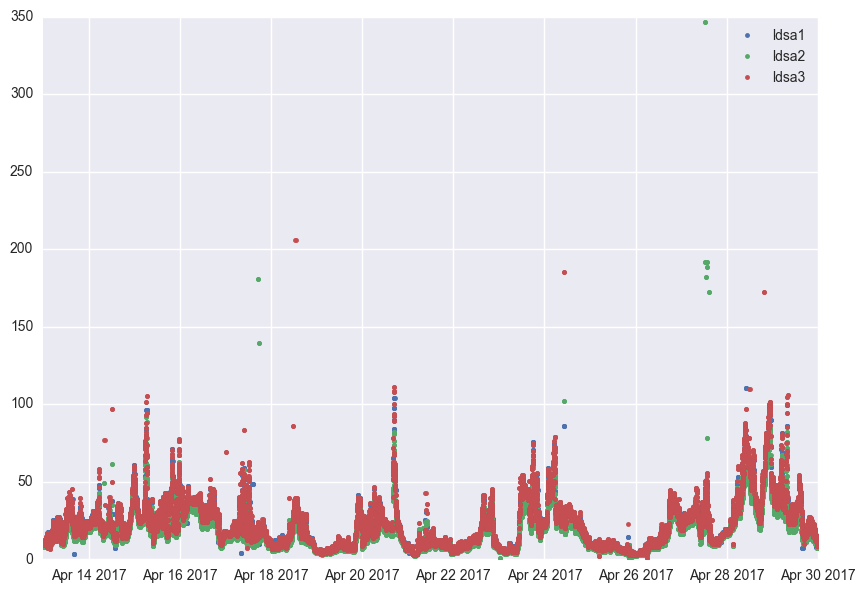

In [129]:
plt.figure(figsize=(10,7))
plt.plot(pegasor['DateTime'],pegasor['ldsa1'],'.')
plt.plot(pegasor['DateTime'],pegasor['ldsa2'],'.')
plt.plot(pegasor['DateTime'],pegasor['ldsa3'],'.')
plt.legend()

In [137]:
pegasor[pegasor['ldsa1']>200]

,DateTime,ldsa1,pn1,ldsa2,pn2,ldsa3,pn3


In [143]:
pegasor[pegasor['ldsa2']>150]

,DateTime,ldsa1,pn1,ldsa2,pn2,ldsa3,pn3
6802,2017-04-17 17:22:00,18.788,107200.317,180.828,736366.760,18.206,105672.417
6803,2017-04-17 17:23:00,18.208,103960.426,180.828,736366.760,18.206,105672.417
20897,2017-04-27 12:18:00,29.435,168827.972,346.379,1456889.160,32.717,189741.348
20898,2017-04-27 12:19:00,30.248,172984.467,346.379,1456889.160,30.501,176885.330
20911,2017-04-27 12:32:00,31.170,178745.300,191.896,809153.809,35.210,204293.747
20912,2017-04-27 12:33:00,31.170,178745.300,191.896,809153.809,39.633,229944.809
20937,2017-04-27 12:58:00,44.224,253744.324,182.180,768874.573,33.977,197201.797
20938,2017-04-27 12:59:00,30.213,173436.066,182.180,768874.573,28.595,165973.190
20959,2017-04-27 13:20:00,37.263,213577.744,188.566,797118.164,42.318,245266.403
20960,2017-04-27 13:21:00,37.263,213577.744,188.566,797118.164,39.877,231376.541


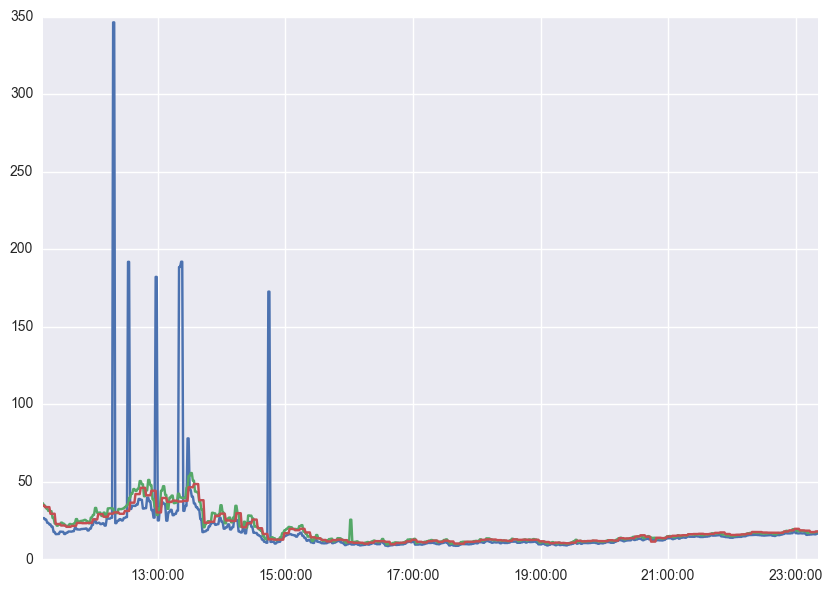

In [147]:
plt.figure(figsize=(10,7))
plt.plot(pegasor['DateTime'][20770:21500],pegasor['ldsa2'][20770:21500])
plt.plot(pegasor['DateTime'][20770:21500],pegasor['ldsa3'][20770:21500])
plt.plot(pegasor['DateTime'][20770:21500],pegasor['ldsa1'][20770:21500])

In [149]:
pegasor[20770:21500]

,index,DateTime,MEASURE_PA_LABEL,MEASURE_MG_LABEL,MEASURE_N_LABEL,PAMBT_LABEL,PAMBRHUM_LABEL,ZEROLEVEL_LABEL,CORONAI_LABEL,CORONAU_LABEL,...,PCORSTAB_LABEL,PCORSTABM_LABEL,TRAPU_LABEL,PROCTEMP_LABEL,STEMP_LABEL,INLETTEMP_LABEL,ELECINTTEMP_LABEL,PFILPRESS_LABEL,PSYSPRESS_LABEL,PCHASFANRPM_LABEL
20770,20771,2017-04-27 10:11:00,17.787,102022,0.7,20.82,67.981,0.003,4978.82,3013.07,...,3,3,398.49,56.997,57.16,91.437,41.547,-35.124,21.328,2668.99
20771,20772,2017-04-27 10:12:00,17.787,102022,0.7,20.82,67.981,0.003,4978.82,3013.07,...,3,3,398.49,56.997,57.16,91.437,41.547,-35.124,21.328,2668.99
20772,20773,2017-04-27 10:13:00,17.787,102022,0.7,20.82,67.981,0.003,4978.82,3013.07,...,3,3,398.473,57.009,57.121,91.127,41.608,-34.903,21.327,2680.7
20773,20774,2017-04-27 10:14:00,14.56,83479.2,0.572,20.822,67.672,0,4978.93,3011.51,...,3,3,398.473,57.009,57.121,91.127,41.608,-34.903,21.327,2680.7
20774,20775,2017-04-27 10:15:00,14.56,83479.2,0.572,20.822,67.672,0,4978.93,3011.51,...,3,3,398.524,56.99,57.118,90.902,41.648,-35.395,21.328,2680.02
20775,20776,2017-04-27 10:16:00,14.56,83479.2,0.572,20.822,67.672,0,4978.93,3011.51,...,3,3,398.524,56.99,57.118,90.902,41.648,-35.395,21.328,2680.02
20776,20777,2017-04-27 10:17:00,14.56,83479.2,0.572,20.822,67.672,0,4978.93,3011.51,...,3,3,398.478,56.922,57.103,90.8,41.678,-34.549,21.234,2684.67
20777,20778,2017-04-27 10:18:00,14.56,83479.2,0.572,20.822,67.672,0,4978.93,3011.51,...,3,3,398.478,56.922,57.103,90.8,41.678,-34.549,21.234,2684.67
20778,20779,2017-04-27 10:19:00,18.232,104433,0.716,20.775,68.213,0.001,4979.1,3011.43,...,3,3,398.515,56.888,57.056,90.514,41.714,-34.376,21.225,2699.5
20779,20780,2017-04-27 10:20:00,18.232,104433,0.716,20.775,68.213,0.001,4979.1,3011.43,...,3,3,398.515,56.888,57.056,90.514,41.714,-34.376,21.225,2699.5
